##1 задание. Ускорение преобразования Фурье

1.1 Замерение времени выполнения преобразования Фурье над случайной последовательностью из 4096 чисел

In [ ]:
import numpy as np
import time

In [ ]:
# Генерация случайной последовательности из 4096 чисел
data = np.random.rand(4096)

# Замер времени перед началом выполнения преобразования
start_time = time.time()

# Преобразование Фурье
fft_result = np.fft.fft(data)

# Замер времени после окончания выполнения преобразования
end_time = time.time()

# Расчет времени выполнения
execution_time = end_time - start_time
print(f"Время выполнения: {execution_time:.6f} секунд")

Время выполнения: 0.000304 секунд


In [ ]:
# Вывод первых 7 значений
print("Первые 7 значений:", data[:7])

# Вывод первых 7 значений результата преобразования
print("Результат преобразования (первые 7 значений):", fft_result[:7])

Первые 7 значений: [0.06748697 0.89146204 0.02277041 0.51592641 0.3044188  0.26644485
 0.3300497 ]
Результат преобразования (первые 7 значений): [ 2.05284871e+03 +0.j          3.97176534e+01 -4.91964441j
 -5.97621370e+00-21.67998765j  7.40758949e+00+20.11441489j
 -1.88907077e+01 +0.86154214j -3.91820759e+00 +2.28660473j
  1.15114877e-01 +5.44064322j]


1.2 Замерение времени выполнения последовательного преобразования Фурье над 2 случайными последовательностями из 4096 чисел

In [ ]:
# Генерация двух случайных последовательностей
data1 = np.random.rand(4096)
data2 = np.random.rand(4096)

# Замер времени выполнения FFT для первой последовательности
start_time1 = time.time()
fft_result1 = np.fft.fft(data1)
end_time1 = time.time()

# Замер времени выполнения FFT для второй последовательности
start_time2 = time.time()
fft_result2 = np.fft.fft(data2)
end_time2 = time.time()

total_time = (end_time1 - start_time1) + (end_time2 - start_time2)

print(f"Общее время выполнения FFT для двух последовательностей: {total_time:.6f} секунд")

Общее время выполнения FFT для двух последовательностей: 0.000626 секунд


1.3 Замерение времени выполнения преобразования Фурье над 2 случайными последовательностями из 4096 чисел в отдельных потоках

In [ ]:
import threading

# Функция для выполнения Фурье-преобразования
def fourier_transform(data, thread_name):
    start_time = time.time()
    transformed_data = np.fft.fft(data)
    end_time = time.time()
    print(f"{thread_name} - Время выполнения: {end_time - start_time:.6f} секунд")
    return transformed_data

# Генерация случайных последовательностей
data1 = np.random.rand(4096)
data2 = np.random.rand(4096)

# Создание потоков
thread1 = threading.Thread(target=fourier_transform, args=(data1, "Поток 1"))
thread2 = threading.Thread(target=fourier_transform, args=(data2, "Поток 2"))

# Запуск потоков
start_time = time.time()
thread1.start()
thread2.start()

# Ожидание завершения потоков
thread1.join()
thread2.join()
end_time = time.time()

print(f"Общее время выполнения программы: {end_time - start_time:.6f} секунд")

Поток 1 - Время выполнения: 0.000288 секунд
Поток 2 - Время выполнения: 0.000220 секунд
Общее время выполнения программы: 0.005976 секунд


1 вывод: Время выполнения FFT (пункт 1.1) составляет 0.000304 секунд - время  для выполнения одного преобразования Фурье. Время последовательного выполнения преобразования Фурье над двумя случайными последовательностями равно 0.000626 секунд, это время будет примерно в два раза больше, чем в пункте 1.1, так как выполняются два последовательных преобразования Фурье.
Время выполнения FFT в потоках составляет 0.005976 секунд, что превышает время работы программы для двух последвательных операций. Вероятное возникновение такого результат может заключаться в том, что в Python существует механизм GIL (Global Interpreter Lock), который используется для управления доступом к объектам Python в многопоточных программах. Он обеспечивает, чтобы только один поток мог выполнять байт-код Python в любой момент времени. Это упрощает управление памятью и предотвращает проблемы с конкурентным доступом к объектам.

##2 задание. Ускорение ожидания преобразования Фурье

2.1 Преобразование Фурье последовательности из 4096 случайных чисел с синхронным “зависанием” на 2 с

In [ ]:
data = np.random.random(4096)
start_time = time.time()
fft_result = np.fft.fft(data)

# "Зависаем" на 2 секунды
time.sleep(2)

end_time = time.time()
execution_time = end_time - start_time
print(f"Время исполнения программы: {execution_time} секунд")

Время исполнения программы: 2.002711534500122 секунд


2.2 В одном потоке: преобразование Фурье и ожидание, во втором потоке: преобразование Фурье другой случайной последовательност из 4096 чисел без ожидания

In [ ]:
def fft_with_sleep():
    data = np.random.rand(4096)
    start_time = time.time()
    fft_result = np.fft.fft(data)
    time.sleep(2)
    end_time = time.time()
    print("Время исполнения потока с ожиданием:", end_time - start_time, "секунд")

def fft_without_sleep():
    data = np.random.rand(4096)
    start_time = time.time()
    fft_result = np.fft.fft(data)
    end_time = time.time()
    print("Время исполнения потока без ожидания:", end_time - start_time, "секунд")

# Создание потоков
thread1 = threading.Thread(target=fft_with_sleep)
thread2 = threading.Thread(target=fft_without_sleep)

# Начало замера времени всей программы
program_start_time = time.time()

# Запуск потоков
thread1.start()
thread2.start()

# Ожидание завершения потоков
thread1.join()
thread2.join()

# Конец замера времени всей программы
program_end_time = time.time()

print("Общее время исполнения программы:", program_end_time - program_start_time, "секунд")

Время исполнения потока без ожидания: 0.00014853477478027344 секунд
Время исполнения потока с ожиданием: 2.0022292137145996 секунд
Общее время исполнения программы: 2.0052833557128906 секунд


2 вывод:
- В п. 2.1 программа выполнялась последовательно, поэтому общее время будет равно времени выполнения преобразования Фурье плюс 2 секунды ожидания и составляет 2.002711534500122 с.
- В п. 2.2 потоки выполняются параллельно. Время исполнения потока с ожиданием примерно такое же, как в п. 2.1, и составит 2.0022292137145996 секунд, но поток без ожидания завершится быстрее, за 0.00014853477478027344 секунд. Общее время программы будет зависеть от более длительного потока (поток с ожиданием).
- Результаты показывают, что использование потоков позволяет выполнять задачи параллельно и, следовательно, может значительно сократить общее время выполнения программы, если одна из задач включает ожидание.

## 3 задание. Исследуем объем используемой динамической памяти

3.1 Создание пустого объекта класса list, заполнение списка числами от 1 до 4096

In [ ]:
import psutil

# Создаем пустой список
numbers_list = []

# Заполняем список числами от 1 до 4096
for i in range(1, 4097):
    numbers_list.append(i)

# Вывод списка
numbers_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

3.2 Замер используемой памяти после каждого добавления

In [ ]:
# Создаем пустой список
numbers_list = []

# Список для хранения значений памяти
memory_usage = []

# Заполняем список числами от 1 до 4096 с замером памяти
for i in range(1, 4097):
    numbers_list.append(i)
    memory_usage.append(psutil.Process().memory_info().rss)  # Используем RSS (Resident Set Size)

memory_usage

[131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131469312,
 131

3.3 Построение зависимости используемой памяти от номера итерации

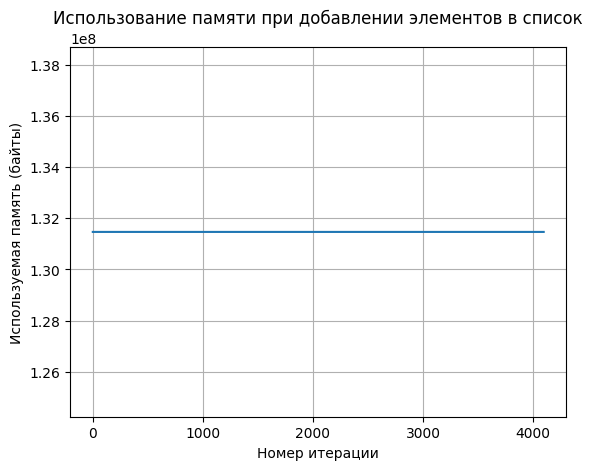

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 4097), memory_usage)
plt.title('Использование памяти при добавлении элементов в список')
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (байты)')
plt.grid()
plt.show()


Повторение операций для большего числа чисел (4*4096)

In [ ]:
# Создаем пустой список
numbers_list = []

# Список для хранения значений памяти
memory_usage = []

# Заполняем список числами от 1 до 4096 с замером памяти
for i in range(1, 4*4097):
    numbers_list.append(i)
    memory_usage.append(psutil.Process().memory_info().rss)  # Используем RSS (Resident Set Size)

memory_usage

[135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135016448,
 135

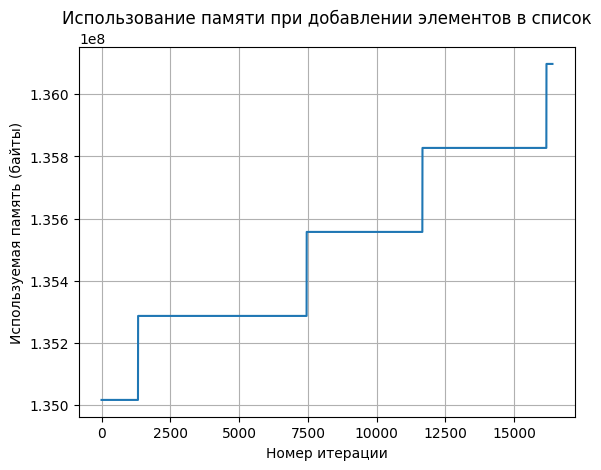

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 4*4097), memory_usage)
plt.title('Использование памяти при добавлении элементов в список')
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (байты)')
plt.grid()
plt.show()


Вывод: При добавлении элементов в список память будет увеличиваться. В начале увеличение небольшое, так как Python использует динамическое выделение памяти. Однако, когда список достигает определенного размера, Python выделяет больше памяти, чтобы вместить новые элементы. Это ведет к скачкообразному увеличению использования памяти (наблюдение для 4*4096 чисел).

3.4 Повторение для структуры данных dict

In [ ]:
import random

# Создаем пустой словарь
numbers_dict = {}

# Список для хранения значений памяти
memory_usage_dict = []

# Заполняем словарь случайными числами
for i in range(1, 4097):
    numbers_dict[i] = random.randint(1, 10000)  # Случайное значение
    memory_usage_dict.append(psutil.Process().memory_info().rss)  # Используем RSS

Построение зависимости для dict

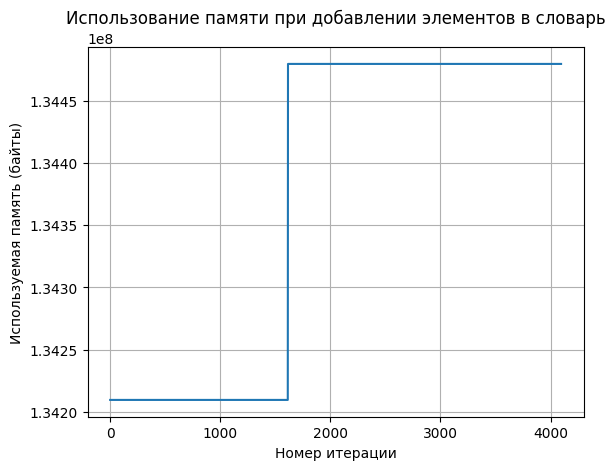

In [ ]:
plt.plot(range(1, 4097), memory_usage_dict)
plt.title('Использование памяти при добавлении элементов в словарь')
plt.xlabel('Номер итерации')
plt.ylabel('Используемая память (байты)')
plt.grid()
plt.show()

Вывод: В случае словаря, использование памяти также будет возрастать, но возможно с другой динамикой. Словари в Python используют хэш-таблицы, что может приводить к более частым перераспределениям памяти по сравнению со списками, особенно при увеличении количества элементов. Это также может вызывать скачки в потреблении памяти.

3 вывод: Сравнение использования памяти в списках и словарях показывает, как разные структуры данных управляют памятью. Списки более линейны в увеличении памяти, тогда как словари могут иметь более резкие изменения из-за их внутренней структуры

## 4 задание. Переполняем стек вызовов

Заполнение списка числами от 1 до 4096 с использованием рекурсии с замером времени выполнения и с замером размера стека вызовов

In [2]:
import sys
sys.setrecursionlimit(5000)  # увеличение предела до 5000
sys.getrecursionlimit()

5000

In [3]:
import time
import inspect
import pandas as pd

stack_size = []
result = []
def recursive_fill(n, result, stack_size):
  while n>0:
    result.append(n)
    current_stack_size = len(inspect.stack())
    stack_size.append(current_stack_size)
    return recursive_fill(n-1, result, stack_size)
  return stack_size

start_time = time.time()
stack_sizes = recursive_fill(4096, result, stack_size)
end_time = time.time()
duration = end_time - start_time

df_stack_sizes = pd.DataFrame({'Итерация': range(1, 4097), 'Размер стека': stack_sizes})
df_stack_sizes.head()
df_stack_sizes.tail()

print(f"Время выполнения рекурсивного заполнения: {duration:} с")


KeyboardInterrupt



В Python предусмотрено ограничение на максимальную глубину рекурсии, для предотвращения переполнение стека и последующего сбоя программы. Это ограничение установлено на достаточно высоком уровне (1000), но иногда, поэтому для решения поставленной задачи, потребовалось увеличение этого предела до 5000, исходя из того, что необходимо было задать 4096 значений. Однако программа осуществляла работу около 4,5 часов и перестала вести счет.

Выполнить задание на меньшем числе чисел (999)

In [4]:
import time
import inspect
import pandas as pd

stack_size = []
result = []
def recursive_fill(n, result, stack_size):
  while n>0:
    result.append(n)
    current_stack_size = len(inspect.stack())
    stack_size.append(current_stack_size)
    return recursive_fill(n-1, result, stack_size)
  return stack_size

start_time = time.time()
stack_sizes = recursive_fill(999, result, stack_size)
end_time = time.time()
duration = end_time - start_time

df_stack_sizes = pd.DataFrame({'Итерация': range(1, 1000), 'Размер стека': stack_sizes})
df_stack_sizes.head()
df_stack_sizes.tail()

print(f"Время выполнения рекурсивного заполнения: {duration:} с")

Время выполнения рекурсивного заполнения: 1900.577407360077 с


Замер времени исполнения для аналогичной операции с использованием циклов (для 4096 значений)

In [ ]:
import time
def list_fill(n):
  result = []
  for i in range(1, n+1):
    result.append(i)
    return result

start_time = time.time()
iterative_list = list_fill(4096)
end_time = time.time()
cicle_duration = end_time - start_time

print(f"Время выполнения заполнения с использованием циклов: {cicle_duration:} с")

Время выполнения заполнения с использованием циклов: 8.535385131835938e-05 с


Замер времени исполнения для аналогичной операции с использованием циклов (для 999 значений)

In [5]:
import time
def list_fill(n):
  result = []
  for i in range(1, n+1):
    result.append(i)
    return result

start_time = time.time()
iterative_list = list_fill(999)
end_time = time.time()
cicle_duration = end_time - start_time

print(f"Время выполнения заполнения с использованием циклов: {cicle_duration:} с")

Время выполнения заполнения с использованием циклов: 9.369850158691406e-05 с


4 вывод: Таким образом, при использовании рекурсии существует ограничение,вызванное лимитированием глубины рекурсии.
Время выполнения программы с использованием цикла для 999 чисел составило 0.9.369850158691406e-05 с, в то время, как для реккурентно заданных значений - 1900.577407360077 с.
Таким образом, накладные расходы по времени на вызов функций и работу со стеком вызовов существенно повлияли на производительность программы. Поэтому использование циклов для таких задач является более эффективным и предпочтительным подходом.